In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("fifa21_raw_data_v2.csv", low_memory=False)
df.info()

In [ ]:
df.describe()

In [156]:
df.head()
list(df.isna().sum())

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 17966,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2595]

In [157]:
# Fixing Loan Date End
df["Loan Date End"].fillna("Not Present",inplace=True)

C:\Users\cnott729\AppData\Local\Temp\ipykernel_14664\56509555.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [158]:

def convertHeight(height):
    # Handle missing values
    if pd.isna(height):
        return height
    # Ensure the value is a string for processing
    if not isinstance(height, str):
        height = str(height)
    # If height is provided in centimeters (e.g., "180cm")
    if 'cm' in height:
        try:
            return float(height.replace('cm', '').strip())
        except Exception as e:
            print(f"Error converting height '{height}': {e}")
            return np.nan
    # If height is provided in feet and inches (e.g., "5'11\"")
    elif "'" in height and '"' in height:
        try:
            parts = height.split("'")
            feet = float(parts[0].strip())
            inches = float(parts[1].replace('"', '').strip())
            # Convert feet and inches to centimeters:
            # 1 foot = 30.48 cm, 1 inch = 2.54 cm
            return feet * 30.48 + inches * 2.54
        except Exception as e:
            print(f"Error parsing height '{height}': {e}")
            return np.nan
    else:
        # Attempt to convert directly if no expected unit is found
        try:
            return float(height)
        except Exception as e:
            print(f"Unable to convert height '{height}': {e}")
            return np.nan

def convertWeight(weight):
    # Handle missing values
    if pd.isna(weight):
        return weight
    # Ensure the value is a string for processing
    if not isinstance(weight, str):
        weight = str(weight)
    # If weight is provided in kilograms (e.g., "70kg")
    if 'kg' in weight:
        try:
            return float(weight.replace('kg', '').strip())
        except Exception as e:
            print(f"Error converting weight '{weight}': {e}")
            return np.nan
    # If weight is provided in pounds (e.g., "154lbs"), convert to kg
    elif 'lbs' in weight:
        try:
            lbs = float(weight.replace('lbs', '').strip())
            # 1 lb = 0.453592 kg
            return lbs * 0.453592
        except Exception as e:
            print(f"Error converting weight from lbs '{weight}': {e}")
            return np.nan
    else:
        # Attempt to convert directly if no expected unit is found
        try:
            return float(weight)
        except Exception as e:
            print(f"Unable to convert weight '{weight}': {e}")
            return np.nan

In [159]:
df['Height'].unique()

array(['170cm', '187cm', '188cm', '181cm', '175cm', '184cm', '191cm',
       '178cm', '193cm', '185cm', '199cm', '173cm', '168cm', '176cm',
       '177cm', '183cm', '180cm', '189cm', '179cm', '195cm', '172cm',
       '182cm', '186cm', '192cm', '165cm', '194cm', '167cm', '196cm',
       '163cm', '190cm', '174cm', '169cm', '171cm', '197cm', '200cm',
       '166cm', '6\'2"', '164cm', '198cm', '6\'3"', '6\'5"', '5\'11"',
       '6\'4"', '6\'1"', '6\'0"', '5\'10"', '5\'9"', '5\'6"', '5\'7"',
       '5\'4"', '201cm', '158cm', '162cm', '161cm', '160cm', '203cm',
       '157cm', '156cm', '202cm', '159cm', '206cm', '155cm'], dtype=object)

In [160]:
df['Weight'].unique()

array(['72kg', '83kg', '87kg', '70kg', '68kg', '80kg', '71kg', '91kg',
       '73kg', '85kg', '92kg', '69kg', '84kg', '96kg', '81kg', '82kg',
       '75kg', '86kg', '89kg', '74kg', '76kg', '64kg', '78kg', '90kg',
       '66kg', '60kg', '94kg', '79kg', '67kg', '65kg', '59kg', '61kg',
       '93kg', '88kg', '97kg', '77kg', '62kg', '63kg', '95kg', '100kg',
       '58kg', '183lbs', '179lbs', '172lbs', '196lbs', '176lbs', '185lbs',
       '170lbs', '203lbs', '168lbs', '161lbs', '146lbs', '130lbs',
       '190lbs', '174lbs', '148lbs', '165lbs', '159lbs', '192lbs',
       '181lbs', '139lbs', '154lbs', '157lbs', '163lbs', '98kg', '103kg',
       '99kg', '102kg', '56kg', '101kg', '57kg', '55kg', '104kg', '107kg',
       '110kg', '53kg', '50kg', '54kg', '52kg'], dtype=object)

In [161]:
df['Height'] = df['Height'].apply(convertHeight)
df['Weight'] = df['Weight'].apply(convertWeight)

In [162]:
print(df.head())

       ID               Name                      LongName  \
0  158023           L. Messi                  Lionel Messi   
1   20801  Cristiano Ronaldo  C. Ronaldo dos Santos Aveiro   
2  200389           J. Oblak                     Jan Oblak   
3  192985       K. De Bruyne               Kevin De Bruyne   
4  190871          Neymar Jr    Neymar da Silva Santos Jr.   

                                           photoUrl  \
0  https://cdn.sofifa.com/players/158/023/21_60.png   
1  https://cdn.sofifa.com/players/020/801/21_60.png   
2  https://cdn.sofifa.com/players/200/389/21_60.png   
3  https://cdn.sofifa.com/players/192/985/21_60.png   
4  https://cdn.sofifa.com/players/190/871/21_60.png   

                                           playerUrl Nationality  Age  ↓OVA  \
0  http://sofifa.com/player/158023/lionel-messi/2...   Argentina   33    93   
1  http://sofifa.com/player/20801/c-ronaldo-dos-s...    Portugal   35    92   
2  http://sofifa.com/player/200389/jan-oblak/210006/    Slo

In [163]:
df['Height'].unique()

array([170.  , 187.  , 188.  , 181.  , 175.  , 184.  , 191.  , 178.  ,
       193.  , 185.  , 199.  , 173.  , 168.  , 176.  , 177.  , 183.  ,
       180.  , 189.  , 179.  , 195.  , 172.  , 182.  , 186.  , 192.  ,
       165.  , 194.  , 167.  , 196.  , 163.  , 190.  , 174.  , 169.  ,
       171.  , 197.  , 200.  , 166.  , 187.96, 164.  , 198.  , 190.5 ,
       195.58, 180.34, 193.04, 185.42, 182.88, 177.8 , 175.26, 167.64,
       170.18, 162.56, 201.  , 158.  , 162.  , 161.  , 160.  , 203.  ,
       157.  , 156.  , 202.  , 159.  , 206.  , 155.  ])

In [164]:
df['Weight'].unique()

array([ 72.      ,  83.      ,  87.      ,  70.      ,  68.      ,
        80.      ,  71.      ,  91.      ,  73.      ,  85.      ,
        92.      ,  69.      ,  84.      ,  96.      ,  81.      ,
        82.      ,  75.      ,  86.      ,  89.      ,  74.      ,
        76.      ,  64.      ,  78.      ,  90.      ,  66.      ,
        60.      ,  94.      ,  79.      ,  67.      ,  65.      ,
        59.      ,  61.      ,  93.      ,  88.      ,  97.      ,
        77.      ,  62.      ,  63.      ,  95.      , 100.      ,
        58.      ,  83.007336,  81.192968,  78.017824,  88.904032,
        79.832192,  83.91452 ,  77.11064 ,  92.079176,  76.203456,
        73.028312,  66.224432,  58.96696 ,  86.18248 ,  78.925008,
        67.131616,  74.84268 ,  72.121128,  87.089664,  82.100152,
        63.049288,  69.853168,  71.213944,  73.935496,  98.      ,
       103.      ,  99.      , 102.      ,  56.      , 101.      ,
        57.      ,  55.      , 104.      , 107.      , 110.   

In [165]:
# Fixing the star in W/F,SM,IR
df["W/F"] = df["W/F"].astype(str).str.replace("★", "").astype(int)
df["SM"] = df["SM"].astype(str).str.replace("★", "").astype(int)
df["IR"] = df["IR"].astype(str).str.replace("★", "").astype(int)

In [166]:
## Fixing the club data that contain new line returns
df["Club"] = df["Club"].astype(str).str.replace("\n", "")

In [167]:
def convertValue(value):
    if isinstance(value, str):  
        value = value.strip('€') 
        if 'M' in value:
            value = float(value.replace('M', '').strip()) * 1000000  
        elif 'K' in value:
            value = float(value.replace('K', '').strip()) * 1000  
        else:
            value = float(value)  
        return float(value)  


def contractLengthCalc():
    length = int(len(df.index))
    for i in range(0,length ):
        value = str(df.loc[i, 'Contract'].strip())
        condtionalCheck = str(df.loc[i,'Contract'][0]).strip().isdigit()
        if condtionalCheck:
            dateList = value.split("~")
            startDate = int(dateList[0])
            endDate = int(dateList[1])
            df.loc[i, 'Contract_Length'] = endDate - startDate
        else:
            df.loc[i, 'Contract_Length'] = -1
            
contractLengthCalc()


# Convert prefered foot to 1 or 2, left or right
# Left foot is a zero....right foot will be zero
df['Preferred Foot'].replace({'Left': 0, 'Right': 1})

C:\Users\cnott729\AppData\Local\Temp\ipykernel_14664\603399732.py:31: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



0        0
1        1
2        1
3        1
4        1
        ..
18974    1
18975    1
18976    1
18977    1
18978    0
Name: Preferred Foot, Length: 18979, dtype: int64

In [168]:
df['Value'] = df['Value'].apply(convertValue)
df['Wage'] = df['Wage'].apply(convertValue)
# df['Release Clause'] = df['Release Clause'].apply(convertValue)
df['Hits'] = df['Hits'].apply(convertValue)

df['Value'] = pd.to_numeric(df['Value'])
df['Wage'] = pd.to_numeric(df['Wage'])
df['Hits'] = pd.to_numeric(df['Hits'])
df['Contract_Length'] = pd.to_numeric(df['Contract_Length'])
df['A/W'].replace({'Low': 0, 'Medium': 1, 'High':2})
df['D/W'].replace({'Low': 0, 'Medium': 1, 'High':2})



C:\Users\cnott729\AppData\Local\Temp\ipykernel_14664\2682720817.py:10: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\cnott729\AppData\Local\Temp\ipykernel_14664\2682720817.py:11: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



0        0
1        0
2        1
3        2
4        1
        ..
18974    1
18975    1
18976    1
18977    1
18978    1
Name: D/W, Length: 18979, dtype: int64

In [169]:
df["W/F"] = df["W/F"].astype(str).str.replace("★", "").astype(int)
df["SM"] = df["SM"].astype(str).str.replace("★", "").astype(int)
df["IR"] = df["IR"].astype(str).str.replace("★", "").astype(int)

In [170]:
df.to_csv('nonEncoded.csv', index=False) 

#ENCODING 

from sklearn.preprocessing import LabelEncoder

# Copy dataset to avoid modifying the original
df_processed = df.copy()

# Initialize dictionary to store label encoders for future inverse transformation
label_encoders = {}

# Apply Label Encoding to categorical features
for col in ['Club', 'Nationality', 'Preferred Foot', 'Best Position', 'A/W', 'D/W']:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col])  
    label_encoders[col] = le  # Store encoder for later use

# Display new dataframe structure
df_processed.info()

# Display unique values of "A/W" and "D/W" after encoding
print("Encoded 'A/W' unique values:", df_processed['A/W'].unique())
print("Encoded 'D/W' unique values:", df_processed['D/W'].unique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 78 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18979 non-null  int64  
 1   Name              18979 non-null  object 
 2   LongName          18979 non-null  object 
 3   photoUrl          18979 non-null  object 
 4   playerUrl         18979 non-null  object 
 5   Nationality       18979 non-null  int32  
 6   Age               18979 non-null  int64  
 7   ↓OVA              18979 non-null  int64  
 8   POT               18979 non-null  int64  
 9   Club              18979 non-null  int32  
 10  Contract          18979 non-null  object 
 11  Positions         18979 non-null  object 
 12  Height            18979 non-null  float64
 13  Weight            18979 non-null  float64
 14  Preferred Foot    18979 non-null  int32  
 15  BOV               18979 non-null  int64  
 16  Best Position     18979 non-null  int32 

In [171]:
# ENCODING - positions 

# Convert "Positions" column into multiple binary (0/1) columns
df_processed.rename(columns=lambda x: x.strip(), inplace=True)

# Check if 'Positions' exists
if "Positions" in df_processed.columns:
    df_processed['Positions'] = df_processed['Positions'].astype(str)  # Ensure it's a string
    df_processed['Positions'] =   df_processed['Positions'].fillna("")# Fill missing values
    positions_split = df_processed['Positions'].str.get_dummies(sep=', ')
    df_processed = pd.concat([df_processed, positions_split], axis=1)
else:
    print("Column 'Positions' not found in DataFrame")

# Display new dataframe structure
df_processed.info()
print(df_processed.columns)

df_processed.to_csv('newdataidk.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 93 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18979 non-null  int64  
 1   Name              18979 non-null  object 
 2   LongName          18979 non-null  object 
 3   photoUrl          18979 non-null  object 
 4   playerUrl         18979 non-null  object 
 5   Nationality       18979 non-null  int32  
 6   Age               18979 non-null  int64  
 7   ↓OVA              18979 non-null  int64  
 8   POT               18979 non-null  int64  
 9   Club              18979 non-null  int32  
 10  Contract          18979 non-null  object 
 11  Positions         18979 non-null  object 
 12  Height            18979 non-null  float64
 13  Weight            18979 non-null  float64
 14  Preferred Foot    18979 non-null  int32  
 15  BOV               18979 non-null  int64  
 16  Best Position     18979 non-null  int32 

In [172]:
common_features = ['Age', 'Reactions', 'Composure', 'Strength', 'Height', 'Weight',
    'Wage', 'Contract_Length', 'Club', 'Nationality', 'Hits', 'Preferred Foot', 'Jumping']

goalkeeper_features = ['GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes']

outfield_features = [ 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'Finishing', 'Dribbling', 'Short Passing',
    'Long Passing', 'Ball Control', 'Acceleration', 'Sprint Speed', 'Agility', 'Balance',
    'Vision', 'Stamina', 'Crossing', 'Curve', 'Shot Power', 'Long Shots',
    'Interceptions', 'Positioning', 'Marking', 'Standing Tackle', 'Sliding Tackle',
    'Volleys', 'FK Accuracy', 'Penalties'] 


# Drop only the columns that exist in the DataFrame
cols_to_drop = ['ID', 'Name', 'LongName', 'photoUrl', 'playerUrl', 'Positions', 'Contract', 'Joined', 'Loan Date End'] 


# Check which columns are actually in the DataFrame before dropping
existing_cols_to_drop = [col for col in cols_to_drop if col in df.columns]
df = df_processed.drop(columns=existing_cols_to_drop)

# Proceed with defining features
features = common_features + goalkeeper_features + outfield_features

print(features)

# Ensure 'Value' is not included in features
features = list(dict.fromkeys(features))  # removes duplicates while preserving order
if 'Value' in features:
    features.remove('Value')
    

df.info()

#Scaling the features
scaler = MinMaxScaler()
df_scaled = df_processed.copy()
df_scaled[features] = scaler.fit_transform(df_scaled[features])
target = 'Value'
df_scaled = df_scaled[features + [target]].dropna() 

expected_cols = common_features + outfield_features + [target]
missing_cols = [col for col in expected_cols if col not in df_scaled.columns]
print("Missing columns:", missing_cols)

['Age', 'Reactions', 'Composure', 'Strength', 'Height', 'Weight', 'Wage', 'Contract_Length', 'Club', 'Nationality', 'Hits', 'Preferred Foot', 'Jumping', 'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'Finishing', 'Dribbling', 'Short Passing', 'Long Passing', 'Ball Control', 'Acceleration', 'Sprint Speed', 'Agility', 'Balance', 'Vision', 'Stamina', 'Crossing', 'Curve', 'Shot Power', 'Long Shots', 'Interceptions', 'Positioning', 'Marking', 'Standing Tackle', 'Sliding Tackle', 'Volleys', 'FK Accuracy', 'Penalties']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 84 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Nationality       18979 non-null  int32  
 1   Age               18979 non-null  int64  
 2   ↓OVA              18979 non-null  int64  
 3   POT               18979 non-null  int64  
 4   Club            

In [173]:
#goalkeeper model 

gk_df = df[df['GK'] == 1].copy()
gk_df = gk_df[common_features + goalkeeper_features + [target]].dropna()


X = gk_df[common_features + goalkeeper_features]
y = gk_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# classification maybe with ova??????
goalkeeper_feature_importance_df = pd.DataFrame({
    
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(goalkeeper_feature_importance_df)


Mean Squared Error: 2140681137205.44
Root Mean Squared Error: 1463106.67
R² Score: 0.92

Feature Importance:
            Feature  Importance
17      GK Reflexes    0.316347
13        GK Diving    0.159730
1         Reactions    0.110613
6              Wage    0.107080
14      GK Handling    0.085614
16   GK Positioning    0.066231
0               Age    0.054476
10             Hits    0.046383
4            Height    0.009498
2         Composure    0.008743
12          Jumping    0.006717
7   Contract_Length    0.006098
8              Club    0.004874
15       GK Kicking    0.004721
3          Strength    0.004529
5            Weight    0.004356
9       Nationality    0.003503
11   Preferred Foot    0.000486


c:\Anaconda\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



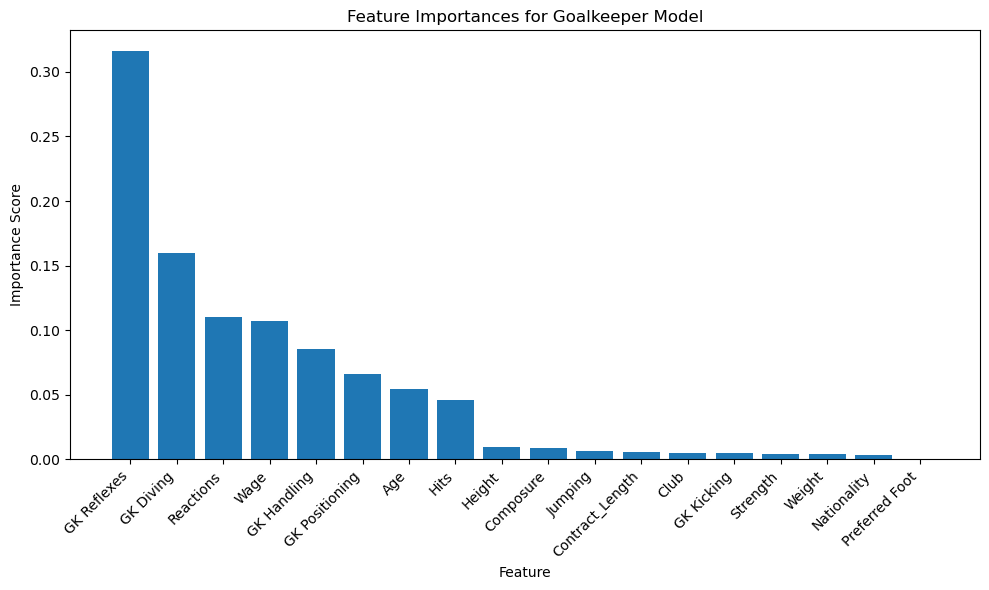

In [174]:
import matplotlib.pyplot as plt
import pandas as pd

# Create the feature importance DataFrame (do this before plotting!)
goalkeeper_feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(goalkeeper_feature_importance_df['Feature'], goalkeeper_feature_importance_df['Importance'])
plt.title('Feature Importances for Goalkeeper Model')
plt.ylabel('Importance Score')
plt.xlabel('Feature')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [175]:
# #outfield model 

player_df = df[df['GK'] == 0].copy()
player_df = player_df[common_features + outfield_features + [target]].dropna()


X = player_df[common_features + outfield_features]
y = player_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

player_model = RandomForestRegressor(random_state=42)
player_model.fit(X_train, y_train)

y_pred = player_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# classification maybe with ova??????
player_feature_importance_df = pd.DataFrame({
    
    'Feature': X.columns,
    'Importance': player_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(player_feature_importance_df)


Mean Squared Error: 6249765537727.35
Root Mean Squared Error: 2499953.11
R² Score: 0.91

Feature Importance:
            Feature  Importance
6              Wage    0.507820
1         Reactions    0.199705
10             Hits    0.119816
0               Age    0.021123
23     Ball Control    0.018450
16              DRI    0.012016
25     Sprint Speed    0.007051
20        Dribbling    0.006941
37  Standing Tackle    0.006111
21    Short Passing    0.005562
7   Contract_Length    0.004996
14              SHO    0.004776
30         Crossing    0.004690
2         Composure    0.004495
35      Positioning    0.004480
13              PAC    0.004442
29          Stamina    0.004011
19        Finishing    0.004003
28           Vision    0.004000
32       Shot Power    0.004000
9       Nationality    0.003234
38   Sliding Tackle    0.003137
24     Acceleration    0.003055
3          Strength    0.002943
22     Long Passing    0.002925
17              DEF    0.002905
36          Marking    0.00

c:\Anaconda\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



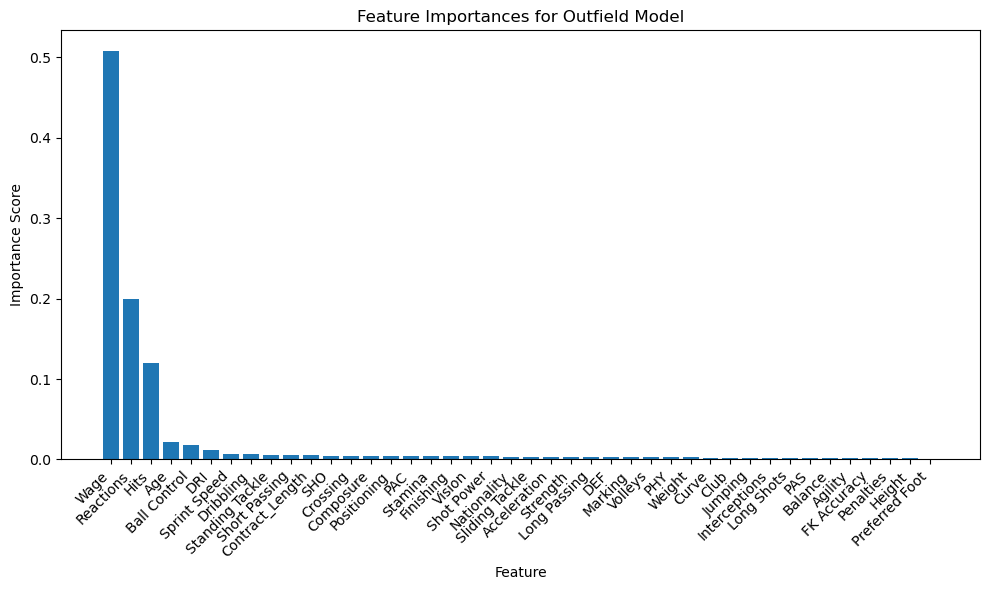

In [176]:
import matplotlib.pyplot as plt
import pandas as pd


# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(player_feature_importance_df['Feature'], player_feature_importance_df['Importance'])
plt.title('Feature Importances for Outfield Model')
plt.ylabel('Importance Score')
plt.xlabel('Feature')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

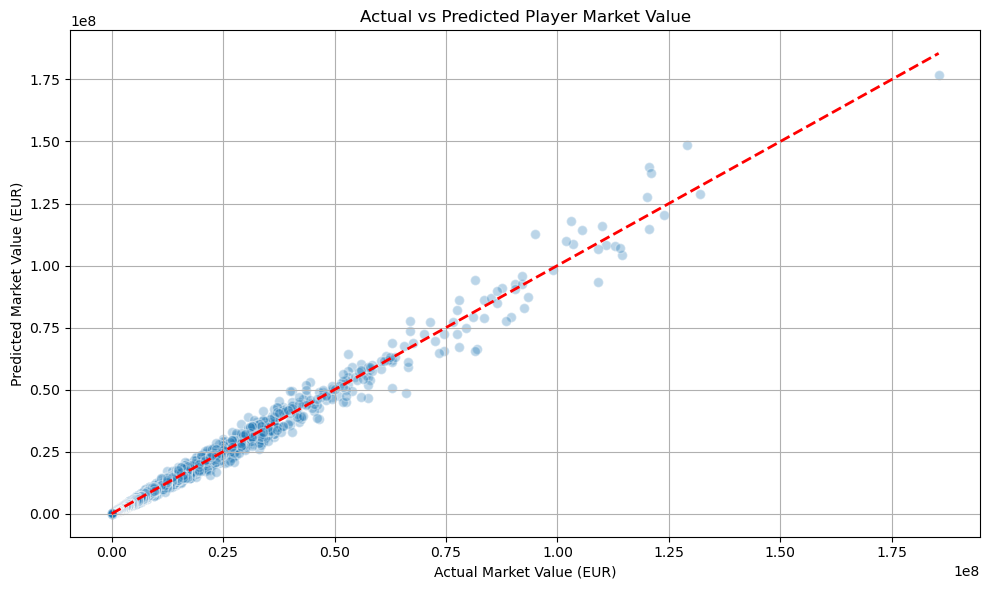

In [177]:
# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
# df = pd.read_csv("fifa21_raw_data_v2.csv")  # Make sure the CSV is in the same folder as your notebook

# Convert 'Value' column (e.g., €20M, €500K) to numeric euros
def convert_value(val):
    if isinstance(val, str):
        val = val.replace('€', '').strip()
        if 'M' in val:
            return float(val.replace('M', '')) * 1_000_000
        elif 'K' in val:
            return float(val.replace('K', '')) * 1_000
        else:
            return float(val)
    return val

df['Value_eur'] = df['Value'].apply(convert_value)

# Drop rows with missing or zero market value
df = df.dropna(subset=['Value_eur'])
df = df[df['Value_eur'] > 0]

# Simulate predicted values (replace this with your actual model predictions)
np.random.seed(42)
df['Predicted_Value_eur'] = df['Value_eur'] * (1 + np.random.normal(0, 0.1, size=len(df)))

# Actual vs predicted
y_actual = df['Value_eur']
y_pred = df['Predicted_Value_eur']

# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(y_actual, y_pred, alpha=0.3, edgecolors='w', s=50)
plt.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], 'r--', lw=2)
plt.xlabel('Actual Market Value (EUR)')
plt.ylabel('Predicted Market Value (EUR)')
plt.title('Actual vs Predicted Player Market Value')
plt.grid(True)
plt.tight_layout()
plt.show()


In [178]:
# import pandas as pd
import plotly.express as px

# # Load your dataset
# df = pd.read_csv("cleaned_fifa21_data.csv")

# Clean the 'Wage' column: remove '€' and 'K', convert to float (thousands), then to millions
df['Wage'] = df['Wage'].replace('[€K]', '', regex=True).astype(float)
df['Wage'] = df['Wage'] * 1000 / 1_000_000  # Convert to millions of EUR

# Group by nationality and calculate average wage
avg_wage_by_nationality = df.groupby('Nationality', as_index=False)['Wage'].mean()

# Drop any rows with missing wage values
avg_wage_by_nationality.dropna(subset=['Wage'], inplace=True)

# Create the choropleth map
fig = px.choropleth(
    avg_wage_by_nationality,
    locations='Nationality',
    locationmode='country names',
    color='Wage',
    title='Average Wage by Nationality (in Millions of EUR)',
    color_continuous_scale='Blues',
    labels={'Wage': 'Average Wage (M EUR)'}
)

fig.show()

Top 5 Paid Nationalities (Average Wage in Thousands of EUR) with More Than 10 Players:
   Nationality     Wage_K
1      Algeria  21.754717
31       Gabon  20.796875
70      Russia  18.110897
45       Italy  17.054651
10      Brazil  16.693799


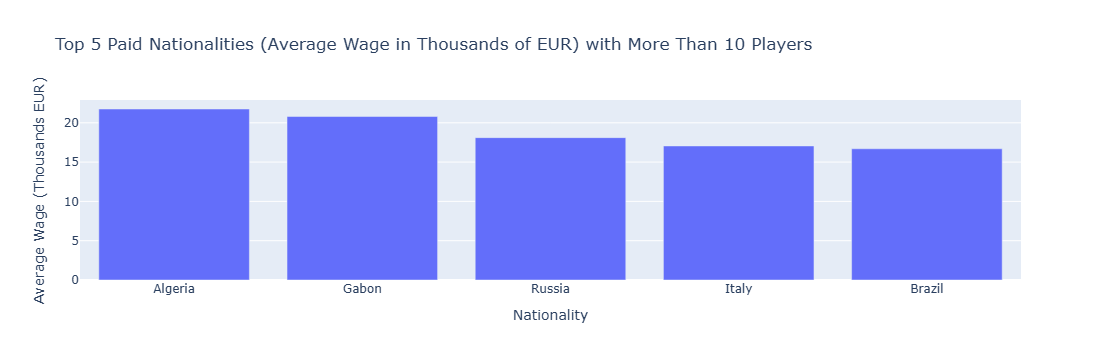

In [179]:
import pandas as pd
import plotly.express as px

# Load dataset
file_path = "nonEncoded.csv"
df = pd.read_csv(file_path)

# Ensure 'Wage' column exists and is numeric
if 'Wage' in df.columns and pd.api.types.is_numeric_dtype(df['Wage']):
    df['Wage_K'] = df['Wage'] / 1000  # Convert to thousands
else:
    raise ValueError("Column 'Wage' is missing or not numeric")

# Count number of players per nationality
nationality_counts = df['Nationality'].value_counts()

# Filter nationalities with more than 3 players
df_filtered = df[df['Nationality'].isin(nationality_counts[nationality_counts > 10].index)]

# Group by nationality and calculate average wage
avg_wage_by_nationality = df_filtered.groupby('Nationality', as_index=False)['Wage_K'].mean()

# Drop missing values and get top 5
top5_paid = avg_wage_by_nationality.dropna().sort_values(by='Wage_K', ascending=False).head(5)

# Print results
print("Top 5 Paid Nationalities (Average Wage in Thousands of EUR) with More Than 10 Players:")
print(top5_paid)

# Plot as bar chart
fig = px.bar(
    top5_paid,
    x='Nationality',
    y='Wage_K',
    title="Top 5 Paid Nationalities (Average Wage in Thousands of EUR) with More Than 10 Players",
    labels={'Wage_K': 'Average Wage (Thousands EUR)'}
)
fig.show()

Top 5 Paid Nationalities (Average Wage in Thousands of EUR) with More Than 100 Players:
   Nationality     Wage_K
17       Italy  17.054651
5       Brazil  16.693799
34      Serbia  15.407364
3      Belgium  15.148305
35       Spain  15.031455


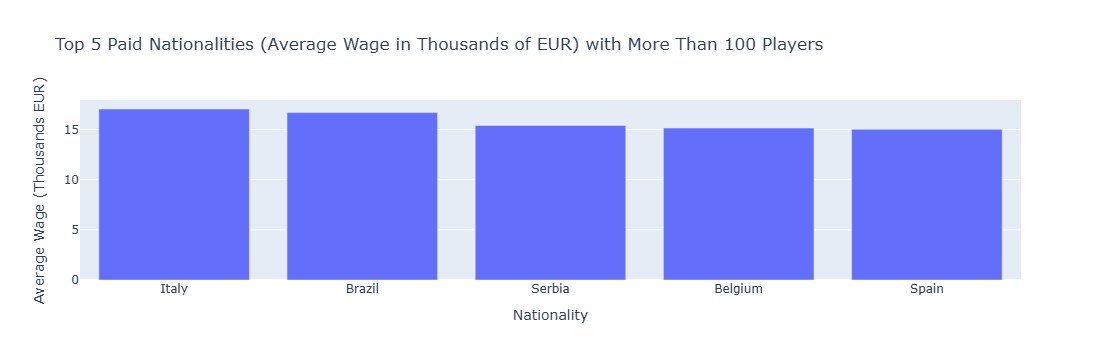

In [180]:
import pandas as pd
import plotly.express as px

# Load dataset
file_path = "nonEncoded.csv"
df = pd.read_csv(file_path)

# Ensure 'Wage' column exists and is numeric
if 'Wage' in df.columns and pd.api.types.is_numeric_dtype(df['Wage']):
    df['Wage_K'] = df['Wage'] / 1000  # Convert to thousands
else:
    raise ValueError("Column 'Wage' is missing or not numeric")

# Count number of players per nationality
nationality_counts = df['Nationality'].value_counts()

# Filter nationalities with more than 3 players
df_filtered = df[df['Nationality'].isin(nationality_counts[nationality_counts > 100].index)]

# Group by nationality and calculate average wage
avg_wage_by_nationality = df_filtered.groupby('Nationality', as_index=False)['Wage_K'].mean()

# Drop missing values and get top 5
top5_paid = avg_wage_by_nationality.dropna().sort_values(by='Wage_K', ascending=False).head(5)

# Print results
print("Top 5 Paid Nationalities (Average Wage in Thousands of EUR) with More Than 100 Players:")
print(top5_paid)

# Plot as bar chart
fig = px.bar(
    top5_paid,
    x='Nationality',
    y='Wage_K',
    title="Top 5 Paid Nationalities (Average Wage in Thousands of EUR) with More Than 100 Players",
    labels={'Wage_K': 'Average Wage (Thousands EUR)'}
)
fig.show()